In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,make_scorer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [20]:
## 1 | Data Preprocessing ##
"""Prepare data before training"""

# 1.1 Load dataset
df = pd.read_csv('emails.csv')

df_d=df.copy()


In [21]:
df_d

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


## Data Pre Progressing 

In [22]:
#upper/lower case
df_d['text'] = df_d['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# deleting ponction
df_d['text'] = df_d['text'].str.replace('[^\w\s]','')

#removing number
df_d['text'] = df_d['text'].str.replace('\d','')

#stopwords
sw = stopwords.words('english')
df_d['text'] = df_d['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#deleting rare word
delete = pd.Series(' '.join(df_d['text']).split()).value_counts()[-1000:]
df_d['text'] = df_d['text'].apply(lambda x: " ".join(x for x in x.split() if x not in delete))

#lemmi
from textblob import Word
#nltk.download('wordnet')
df_d['text'] = df_d['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

## Creating Countplot seeing to Target

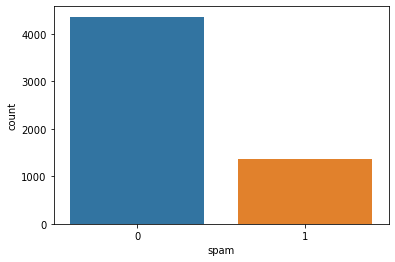

In [23]:
sns.countplot(x='spam', data=df_d);

## word counts

In [24]:
df_d['word_count']=df_d['text'].apply(lambda x:len(str(x).split(' ')))

In [25]:
df1=df_d.sort_values(by='word_count',  ascending=False)
df1.head(10)

,text,spam,word_count
2650,subject enron india newsdesk april th newsclip...,0,4121
1380,subject enron india newsdesk april th newsclip...,0,4041
2338,subject enron india newsdesk april rd newsclip...,0,2675
2560,subject enron india newsdesk may newsclips sti...,0,2440
536,subject make thousand sending email easy yahoo...,1,2272
151,subject industry giant match opportunity anoth...,1,2148
49,subject breaking biotech news hey thought migh...,1,1803
126,subject investment op proven nasa technology h...,1,1795
1083,subject account information email advertise pe...,1,1696
1594,subject enron india newsdesk may th newsclips ...,0,1625


## Work Cloud

In [26]:
text = df1["text"][0]
text1 = df1["text"][1]


In [27]:
wordcloud = WordCloud().generate(text)
wordcloud1 = WordCloud().generate(text1)

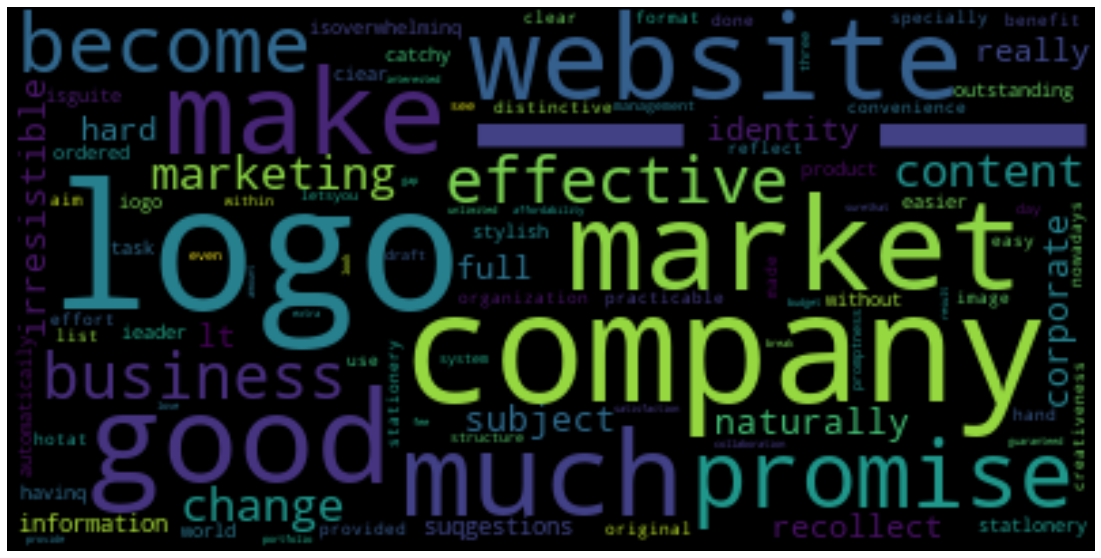

In [28]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

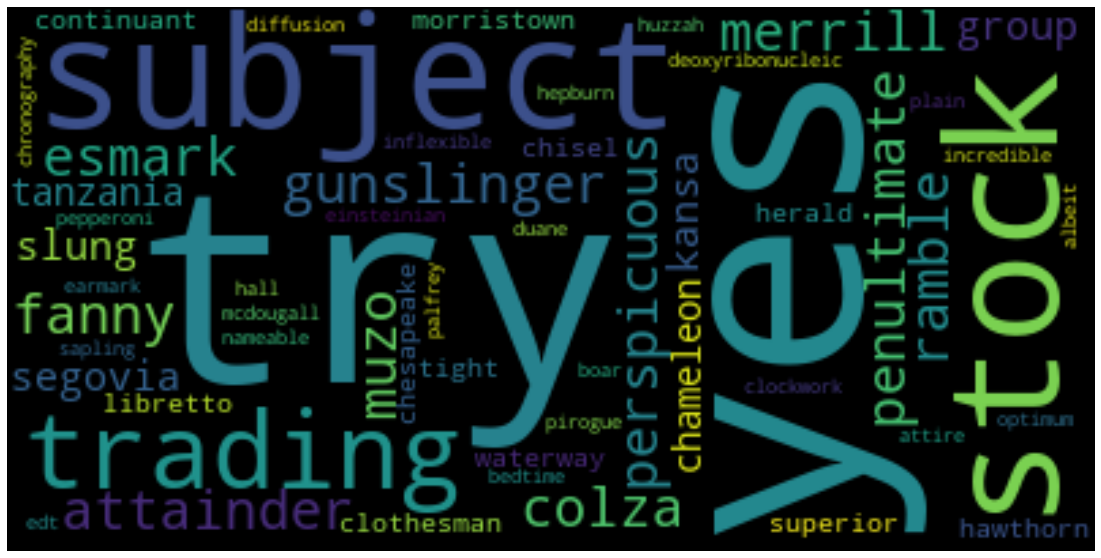

In [29]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud1, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Crating Model

## AUTOMATING MACHINE LEARNING TASKS

In [30]:
def compML(df, alg):
    #train-test ayrimi
    y=df["spam"]
    message = CountVectorizer().fit_transform(df_d['text'])
    X=message
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    Cl_report = classification_report(y_test, y_pred)
    model_name = alg.__name__
    print(model_name, "conf_matrix:\n",conf_matrix)
    print(model_name,  'classification_report:\n',Cl_report )

In [31]:
models = [ LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,MultinomialNB]

In [32]:
for i in models:
    compML(df, i)

LogisticRegression conf_matrix:
 [[1056    7]
 [   9  360]]
LogisticRegression classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1063
           1       0.98      0.98      0.98       369

    accuracy                           0.99      1432
   macro avg       0.99      0.98      0.99      1432
weighted avg       0.99      0.99      0.99      1432

KNeighborsClassifier conf_matrix:
 [[1035   28]
 [ 111  258]]
KNeighborsClassifier classification_report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      1063
           1       0.90      0.70      0.79       369

    accuracy                           0.90      1432
   macro avg       0.90      0.84      0.86      1432
weighted avg       0.90      0.90      0.90      1432

SVC conf_matrix:
 [[1060    3]
 [  31  338]]
SVC classification_report:
               precision    recall  f1-score   support

        

## Compare Models

In [33]:
compare_model={'LogisticRegression':0.99,
               'KNeighborsClassifier':0.90,
               'SVC':0.98,
               'DecisionTreeClassifier':0.96,
               'RandomForestClassifier':0.98,
               'MultinomialNB':0.99}

In [34]:
data = pd.DataFrame(list(compare_model.items()),columns = ['Model','Accurcy_Score'])

In [35]:
df2=data.sort_values(by='Accurcy_Score', ascending=False)

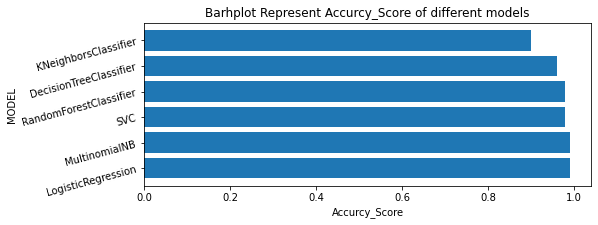

In [36]:
plt.figure(figsize=(8,3))
plt.title("Barhplot Represent Accurcy_Score of different models")
plt.xlabel("Accurcy_Score")
plt.ylabel("MODEL")
plt.barh(df2['Model'],df2['Accurcy_Score']);
plt.yticks(rotation=15);